In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats

In [95]:
year = 2020

df_spot= pd.read_csv(f'/Users/yusuke_miyazaki/Desktop/OneDrive/研究関連データ/JEPX_tradedata/spot_{year}.csv',encoding='Shift-JIS')
df_jikanmae = pd.read_csv(f'/Users/yusuke_miyazaki/Desktop/OneDrive/研究関連データ/JEPX_tradedata/im_trade_summary_{year}.csv',encoding='Shift-JIS')


In [97]:
df_CIF = pd.read_csv(f'/Users/yusuke_miyazaki/Desktop/OneDrive/研究関連データ/CIF_month.csv')


In [74]:
# DATE_TIMEの列を追加
# カラム名がDateとtimecode
def Create_Date_timecode(df):
    df = df.copy()
    Date_list = df['Date'].values
    Time_code = df['timecode'].values
    # 年月日と時刻コードを連結して
    Date_time_list = []
    for i in range(len(df)):
        Date_time = f'{Date_list[i]}_{Time_code[i]}'
        Date_time_list.append(Date_time)

    # df['Datetimes'] = Date_time_list
    df['DATE_timecode'] = Date_time_list
    return(df)

# カラム名がDateとTime
def Create_DateTime2(df):
    Date_Time_list = []
    Date_list = df['Date'].values
    Time_list = df['Time'].values
    for i in range(len(df)):
        Date = Date_list[i]
        Time = Time_list[i]
        str_datetime = f'{Date} {Time}'
        Date_Time_list.append(str_datetime)
    df['DATE_TIME'] = Date_Time_list

    return(df)


In [75]:
# スポット市場の約定量とシステムプライス
df_spot = df_spot.rename(columns={'システムプライス(円/kWh)':'spot_price',
                        '約定総量(kWh)':'volume_spot','年月日':'Date','時刻コード':'timecode'})

df_jikanmae = df_jikanmae.rename(columns={'平均（円/kWh）':'jikanmae_price',
                        '約定量合計（MWh/h）':'volume_jikanmae','年月日':'Date','時刻コード':'timecode'})

df_spot = Create_Date_timecode(df_spot)
df_jikanmae =Create_Date_timecode(df_jikanmae)


# DATE_timecode を軸として二つのdataframeを連結
df_merge = df_spot.merge(df_jikanmae,on='DATE_timecode')

# JEPXの値差の列を追加
df_merge['gap_price'] = df_merge['jikanmae_price'] - df_merge['spot_price']

In [98]:
df_merge

,Date_x,timecode_x,売り入札量(kWh),買い入札量(kWh),volume_spot,spot_price,エリアプライス北海道(円/kWh),エリアプライス東北(円/kWh),エリアプライス東京(円/kWh),エリアプライス中部(円/kWh),...,timecode_y,始値（円/kWh）,高値（円/kWh）,安値（円/kWh）,終値（円/kWh）,jikanmae_price,volume_jikanmae,約定件数,gap_price,Date_Timestamp
0,2020/04/01,1,16592450,18033600,15772950,6.43,6.84,6.76,6.76,4.00,...,1,7.55,9.19,4.87,9.19,6.91,139.5,27,0.48,2020-04-01
1,2020/04/01,2,16986950,18180600,15766550,5.77,6.62,6.62,6.62,3.73,...,2,6.98,8.46,4.19,7.51,6.57,138.1,26,0.80,2020-04-01
2,2020/04/01,3,17263950,18234450,15990350,5.18,6.61,6.61,6.61,4.09,...,3,6.75,8.00,4.09,8.00,6.67,113.3,27,1.49,2020-04-01
3,2020/04/01,4,17583250,18565050,16078100,4.87,6.51,6.51,6.51,4.04,...,4,6.55,8.46,4.04,8.46,6.46,95.5,24,1.59,2020-04-01
4,2020/04/01,5,17943550,18738950,16338200,4.87,6.51,6.51,6.51,4.09,...,5,6.74,7.95,4.09,7.95,6.38,87.3,27,1.51,2020-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2021/03/31,44,23010850,20725100,16845750,5.40,5.40,5.40,5.40,5.40,...,44,5.50,5.50,4.00,4.59,4.83,240.8,103,-0.57,2021-03-31
17516,2021/03/31,45,21547800,20580150,15683350,5.35,5.35,5.35,5.35,5.35,...,45,5.45,5.45,4.29,4.50,5.10,219.5,88,-0.25,2021-03-31
17517,2021/03/31,46,21324650,20127250,15504850,5.25,5.25,5.25,5.25,5.25,...,46,5.35,5.35,4.00,4.60,5.00,173.1,82,-0.25,2021-03-31
17518,2021/03/31,47,20730900,19680450,15437100,5.24,5.24,5.24,5.24,5.24,...,47,5.34,5.34,4.15,4.50,5.07,297.5,91,-0.17,2021-03-31


In [ ]:
df_merge.

In [76]:
df_CIF['year'] =  df_CIF['year'].interpolate('ffill')

In [77]:
df_CIF['month'] =  np.array(df_CIF['month'].values,dtype='int')

In [78]:
df_CIF = df_CIF.dropna()

In [79]:
df_CIF

,ind,year,month,石油ガス量,石油ガス価格,石油ガス価格/量,液化石油ガス量,液化石油ガス価格,液化石油ガス価格/量,LNG量,LNG価格,LNG価格/量
0,1.0,2016年,1,"8,140,521","397,775,570",48.86,"895,487","48,854,408",54.56,"7,245,034","348,921,162",48.16
1,2.0,2016年,2,"8,519,167","400,956,938",47.07,"1,086,206","47,472,550",43.70,"7,432,961","353,482,312",47.56
2,3.0,2016年,3,"9,577,926","399,936,356",41.76,"1,429,295","54,438,930",38.09,"8,148,631","345,497,426",42.40
3,4.0,2016年,4,"7,032,717","257,665,189",36.64,"650,403","25,816,677",39.69,"6,382,314","231,846,933",36.33
4,5.0,2016年,5,"6,261,980","213,332,576",34.07,"739,235","29,709,345",40.19,"5,522,745","183,623,231",33.25
...,...,...,...,...,...,...,...,...,...,...,...,...
77,78.0,2022年,6,"6,597,872","672,320,073",101.90,"793,717","85,502,543",107.72,"5,804,154","586,815,695",101.10
78,79.0,2022年,7,"6,862,649","849,162,879",123.74,"699,215","75,986,381",108.67,"6,163,434","773,176,498",125.45
79,80.0,2022年,8,"7,149,917","961,361,454",134.46,"875,493","86,889,480",99.25,"6,274,424","874,469,880",139.37
80,81.0,2022年,9,"6,132,289","958,883,291",156.37,"807,524","80,712,240",99.95,"5,324,765","878,171,051",164.92


In [80]:
df_merge

,Date_x,timecode_x,売り入札量(kWh),買い入札量(kWh),volume_spot,spot_price,エリアプライス北海道(円/kWh),エリアプライス東北(円/kWh),エリアプライス東京(円/kWh),エリアプライス中部(円/kWh),...,Date_y,timecode_y,始値（円/kWh）,高値（円/kWh）,安値（円/kWh）,終値（円/kWh）,jikanmae_price,volume_jikanmae,約定件数,gap_price
0,2020/04/01,1,16592450,18033600,15772950,6.43,6.84,6.76,6.76,4.00,...,2020/04/01,1,7.55,9.19,4.87,9.19,6.91,139.5,27,0.48
1,2020/04/01,2,16986950,18180600,15766550,5.77,6.62,6.62,6.62,3.73,...,2020/04/01,2,6.98,8.46,4.19,7.51,6.57,138.1,26,0.80
2,2020/04/01,3,17263950,18234450,15990350,5.18,6.61,6.61,6.61,4.09,...,2020/04/01,3,6.75,8.00,4.09,8.00,6.67,113.3,27,1.49
3,2020/04/01,4,17583250,18565050,16078100,4.87,6.51,6.51,6.51,4.04,...,2020/04/01,4,6.55,8.46,4.04,8.46,6.46,95.5,24,1.59
4,2020/04/01,5,17943550,18738950,16338200,4.87,6.51,6.51,6.51,4.09,...,2020/04/01,5,6.74,7.95,4.09,7.95,6.38,87.3,27,1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2021/03/31,44,23010850,20725100,16845750,5.40,5.40,5.40,5.40,5.40,...,2021/03/31,44,5.50,5.50,4.00,4.59,4.83,240.8,103,-0.57
17516,2021/03/31,45,21547800,20580150,15683350,5.35,5.35,5.35,5.35,5.35,...,2021/03/31,45,5.45,5.45,4.29,4.50,5.10,219.5,88,-0.25
17517,2021/03/31,46,21324650,20127250,15504850,5.25,5.25,5.25,5.25,5.25,...,2021/03/31,46,5.35,5.35,4.00,4.60,5.00,173.1,82,-0.25
17518,2021/03/31,47,20730900,19680450,15437100,5.24,5.24,5.24,5.24,5.24,...,2021/03/31,47,5.34,5.34,4.15,4.50,5.07,297.5,91,-0.17


In [81]:
date = df_merge.Date_x.values[0]


In [82]:
dt.datetime.strptime(date,'%Y/%m/%d')

datetime.datetime(2020, 4, 1, 0, 0)

In [83]:
date

'2020/04/01'

In [84]:
date_timestamp = []

for date in df_merge.Date_x.values:
    date_timestamp.append(dt.datetime.strptime(date,'%Y/%m/%d'))

In [85]:
df_merge['Date_Timestamp'] = date_timestamp

In [86]:
ave_volume_jikanmae =[]

for num_month in range(4,11):

    df_select = df_merge[df_merge['Date_Timestamp'].dt.month == num_month]
    month_mean_volume_jikanmae =  np.mean(df_select['volume_jikanmae'].values)
    ave_volume_jikanmae.append(month_mean_volume_jikanmae)


In [87]:
df_merge['Date_Timestamp'].dt.month

0        4
1        4
2        4
3        4
4        4
        ..
17515    3
17516    3
17517    3
17518    3
17519    3
Name: Date_Timestamp, Length: 17520, dtype: int64

In [88]:
ave_volume_jikanmae

[368.2481944444444,
 456.06720430107526,
 811.1806944444446,
 554.8190860215053,
 501.6663306451613,
 591.6859722222222,
 252.52963709677417]

In [89]:
df_merge

,Date_x,timecode_x,売り入札量(kWh),買い入札量(kWh),volume_spot,spot_price,エリアプライス北海道(円/kWh),エリアプライス東北(円/kWh),エリアプライス東京(円/kWh),エリアプライス中部(円/kWh),...,timecode_y,始値（円/kWh）,高値（円/kWh）,安値（円/kWh）,終値（円/kWh）,jikanmae_price,volume_jikanmae,約定件数,gap_price,Date_Timestamp
0,2020/04/01,1,16592450,18033600,15772950,6.43,6.84,6.76,6.76,4.00,...,1,7.55,9.19,4.87,9.19,6.91,139.5,27,0.48,2020-04-01
1,2020/04/01,2,16986950,18180600,15766550,5.77,6.62,6.62,6.62,3.73,...,2,6.98,8.46,4.19,7.51,6.57,138.1,26,0.80,2020-04-01
2,2020/04/01,3,17263950,18234450,15990350,5.18,6.61,6.61,6.61,4.09,...,3,6.75,8.00,4.09,8.00,6.67,113.3,27,1.49,2020-04-01
3,2020/04/01,4,17583250,18565050,16078100,4.87,6.51,6.51,6.51,4.04,...,4,6.55,8.46,4.04,8.46,6.46,95.5,24,1.59,2020-04-01
4,2020/04/01,5,17943550,18738950,16338200,4.87,6.51,6.51,6.51,4.09,...,5,6.74,7.95,4.09,7.95,6.38,87.3,27,1.51,2020-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2021/03/31,44,23010850,20725100,16845750,5.40,5.40,5.40,5.40,5.40,...,44,5.50,5.50,4.00,4.59,4.83,240.8,103,-0.57,2021-03-31
17516,2021/03/31,45,21547800,20580150,15683350,5.35,5.35,5.35,5.35,5.35,...,45,5.45,5.45,4.29,4.50,5.10,219.5,88,-0.25,2021-03-31
17517,2021/03/31,46,21324650,20127250,15504850,5.25,5.25,5.25,5.25,5.25,...,46,5.35,5.35,4.00,4.60,5.00,173.1,82,-0.25,2021-03-31
17518,2021/03/31,47,20730900,19680450,15437100,5.24,5.24,5.24,5.24,5.24,...,47,5.34,5.34,4.15,4.50,5.07,297.5,91,-0.17,2021-03-31


In [90]:
df_CIF_2022 = df_CIF[df_CIF['year'] =='2022年'][3:]

In [91]:
df_CIF_2022['ave_volume_jikanmae'] =ave_volume_jikanmae

In [92]:
df_CIF_2022

,ind,year,month,石油ガス量,石油ガス価格,石油ガス価格/量,液化石油ガス量,液化石油ガス価格,液化石油ガス価格/量,LNG量,LNG価格,LNG価格/量,ave_volume_jikanmae
75,76.0,2022年,4,"6,381,726","645,273,494",101.11,"807,586","87,994,647",108.96,"5,574,140","557,278,847",99.98,368.248194
76,77.0,2022年,5,"6,688,721","708,084,177",105.86,"928,465","106,677,752",114.90,"5,760,256","601,403,987",104.41,456.067204
77,78.0,2022年,6,"6,597,872","672,320,073",101.90,"793,717","85,502,543",107.72,"5,804,154","586,815,695",101.10,811.180694
78,79.0,2022年,7,"6,862,649","849,162,879",123.74,"699,215","75,986,381",108.67,"6,163,434","773,176,498",125.45,554.819086
79,80.0,2022年,8,"7,149,917","961,361,454",134.46,"875,493","86,889,480",99.25,"6,274,424","874,469,880",139.37,501.666331
80,81.0,2022年,9,"6,132,289","958,883,291",156.37,"807,524","80,712,240",99.95,"5,324,765","878,171,051",164.92,591.685972
81,82.0,2022年,10,"5,768,029","860,082,270",149.11,"681,364","64,836,599",95.16,"5,086,665","795,245,341",156.34,252.529637


In [93]:
df_CIF_2022

,ind,year,month,石油ガス量,石油ガス価格,石油ガス価格/量,液化石油ガス量,液化石油ガス価格,液化石油ガス価格/量,LNG量,LNG価格,LNG価格/量,ave_volume_jikanmae
75,76.0,2022年,4,"6,381,726","645,273,494",101.11,"807,586","87,994,647",108.96,"5,574,140","557,278,847",99.98,368.248194
76,77.0,2022年,5,"6,688,721","708,084,177",105.86,"928,465","106,677,752",114.90,"5,760,256","601,403,987",104.41,456.067204
77,78.0,2022年,6,"6,597,872","672,320,073",101.90,"793,717","85,502,543",107.72,"5,804,154","586,815,695",101.10,811.180694
78,79.0,2022年,7,"6,862,649","849,162,879",123.74,"699,215","75,986,381",108.67,"6,163,434","773,176,498",125.45,554.819086
79,80.0,2022年,8,"7,149,917","961,361,454",134.46,"875,493","86,889,480",99.25,"6,274,424","874,469,880",139.37,501.666331
80,81.0,2022年,9,"6,132,289","958,883,291",156.37,"807,524","80,712,240",99.95,"5,324,765","878,171,051",164.92,591.685972
81,82.0,2022年,10,"5,768,029","860,082,270",149.11,"681,364","64,836,599",95.16,"5,086,665","795,245,341",156.34,252.529637


<AxesSubplot: xlabel='液化石油ガス量', ylabel='ave_volume_jikanmae'>

/Users/yusuke_miyazaki/miniforge3/envs/DSenv385/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 28082 (\N{CJK UNIFIED IDEOGRAPH-6DB2}) missing from current font.
  func(*args, **kwargs)
/Users/yusuke_miyazaki/miniforge3/envs/DSenv385/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  func(*args, **kwargs)
/Users/yusuke_miyazaki/miniforge3/envs/DSenv385/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 30707 (\N{CJK UNIFIED IDEOGRAPH-77F3}) missing from current font.
  func(*args, **kwargs)
/Users/yusuke_miyazaki/miniforge3/envs/DSenv385/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27833 (\N{CJK UNIFIED IDEOGRAPH-6CB9}) missing from current font.
  func(*args, **kwargs)
/Users/yusuke_miyazaki/miniforge3/envs/DSenv385/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12460 (\N{KATAKANA LETTER GA})

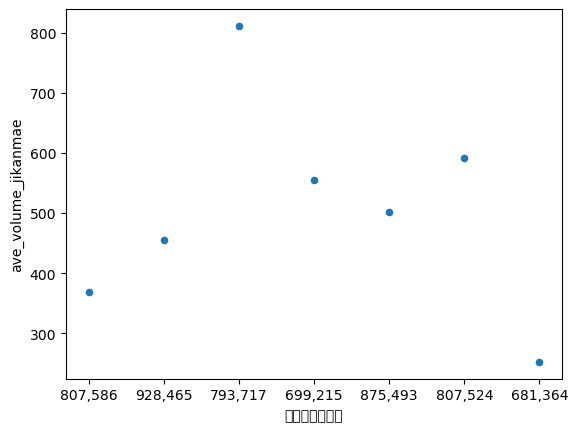

In [94]:
df_CIF_2022.plot.scatter(x='液化石油ガス量',y='ave_volume_jikanmae')